In [1]:
from datascience import *
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots

data=Table.read_table('20172058-data1.csv')
soccer = data.drop('HomeRatio','AwayGoalsDiff','Unnamed: 15')

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  after removing the cwd from sys.path.


In [2]:
soccer = soccer.where('Games',are.above(19))
soccer

Sport,Country,League,Year,Season,Team,Games,HomeWins,HomeDraw,HomeLoss,AwayWins,AwayDraw,AwayLoss
Football,Algeria,Algeria-Ligue-1,2010,-,MC Oran,34,10,5,2,0,6,11
Football,Algeria,Algeria-Ligue-1,2010,-,NA Hussein Dey,34,3,5,9,0,5,12
Football,Algeria,Algeria-Ligue-1,2011,-,MC El Eulma,29,9,3,2,0,6,9
Football,Algeria,Algeria-Ligue-1,2011,-,Annaba,29,10,5,0,0,1,13
Football,Algeria,Algeria-Ligue-1,2012,-,Khroub,30,7,5,3,0,5,10
Football,Algeria,Algeria-Ligue-1,2012,-,NA Hussein Dey,29,5,5,4,0,5,10
Football,Algeria,Algeria-Ligue-1,2012,-,Sa?da,30,6,6,3,0,1,14
Football,Algeria,Algeria-Ligue-1,2014,-,A?n Fakroun,29,5,1,8,0,4,11
Football,Algeria,Algeria-Ligue-1,2016,-,USM Blida,22,5,5,1,0,6,5
Football,Algeria,Algeria-Ligue-1,2016,-,ASM Oran,22,5,2,4,0,1,10


In [3]:
HomePct = soccer.column('HomeWins')/(soccer.column('HomeWins')+soccer.column('HomeDraw')+soccer.column('HomeLoss'))
AwayPct = soccer.column('AwayWins')/(soccer.column('AwayWins')+soccer.column('AwayDraw')+soccer.column('AwayLoss'))

In [4]:
Home = soccer.select('Team','Year').with_columns(
    'Home','Home',
    'HomeWinRate',HomePct*100)
Away = soccer.select('Team','Year').with_columns(
    'Away','Away',
    'AwayWinRate',AwayPct*100)

In [ ]:
Home = Home.with_column('HomeWinRate',HomePct*100)
Away = Away.with_column('AwayWinRate',AwayPct*100)

In [ ]:
soccer = soccer.with_columns(
    'HomePct',HomePct,
    'AwayPct',AwayPct).drop('Sport','Season')
soccer.set_format('HomePct', PercentFormatter)
soccer.set_format('AwayPct', PercentFormatter)
soccer

Country,League,Year,Team,Games,HomeWins,HomeDraw,HomeLoss,AwayWins,AwayDraw,AwayLoss,HomePct,AwayPct
Algeria,Algeria-Ligue-1,2010,MC Oran,34,10,5,2,0,6,11,58.82%,0.00%
Algeria,Algeria-Ligue-1,2010,NA Hussein Dey,34,3,5,9,0,5,12,17.65%,0.00%
Algeria,Algeria-Ligue-1,2011,MC El Eulma,29,9,3,2,0,6,9,64.29%,0.00%
Algeria,Algeria-Ligue-1,2011,Annaba,29,10,5,0,0,1,13,66.67%,0.00%
Algeria,Algeria-Ligue-1,2012,Khroub,30,7,5,3,0,5,10,46.67%,0.00%
Algeria,Algeria-Ligue-1,2012,NA Hussein Dey,29,5,5,4,0,5,10,35.71%,0.00%
Algeria,Algeria-Ligue-1,2012,Sa?da,30,6,6,3,0,1,14,40.00%,0.00%
Algeria,Algeria-Ligue-1,2014,A?n Fakroun,29,5,1,8,0,4,11,35.71%,0.00%
Algeria,Algeria-Ligue-1,2016,USM Blida,22,5,5,1,0,6,5,45.45%,0.00%
Algeria,Algeria-Ligue-1,2016,ASM Oran,22,5,2,4,0,1,10,45.45%,0.00%


In [ ]:
WinRate = Table().with_columns('HomePct',soccer.column('HomePct')*100,
                         'AwayPct',soccer.column('AwayPct')*100)
WinRate

HomePct,AwayPct
58.8235,0
17.6471,0
64.2857,0
66.6667,0
46.6667,0
35.7143,0
40,0
35.7143,0
45.4545,0
45.4545,0


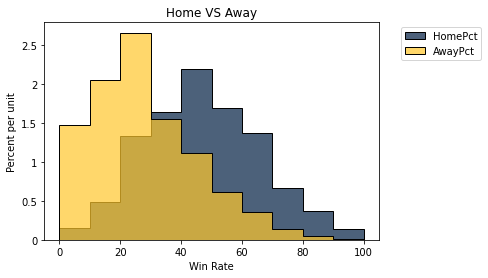

In [ ]:
WinRate.hist()
plots.xlabel('Win Rate')
plots.title('Home VS Away');

In [ ]:
Home

Team,Year,Home,HomeWinRate
MC Oran,2010,Home,58.8235
NA Hussein Dey,2010,Home,17.6471
MC El Eulma,2011,Home,64.2857
Annaba,2011,Home,66.6667
Khroub,2012,Home,46.6667
NA Hussein Dey,2012,Home,35.7143
Sa?da,2012,Home,40
A?n Fakroun,2014,Home,35.7143
USM Blida,2016,Home,45.4545
ASM Oran,2016,Home,45.4545


In [ ]:
s = Home.column(2)
s = np.append(s,Away.column(2))
s

array(['Home', 'Home', 'Home', ..., 'Away', 'Away', 'Away'], dtype='<U4')

In [ ]:
Home = Home.drop('Team','Year')
Away = Away.drop('Team','Year')

In [ ]:
v = Home.column(1)
v = np.append(v,Away.column(1))
v

array([58.82352941, 17.64705882, 64.28571429, ..., 53.33333333,
       33.33333333, 28.57142857])

In [ ]:
t = Table().with_columns(
    'Stadium',s,
    'WinRate',v
)
t

Stadium,WinRate
Home,58.8235
Home,17.6471
Home,64.2857
Home,66.6667
Home,46.6667
Home,35.7143
Home,40
Home,35.7143
Home,45.4545
Home,45.4545


In [ ]:
t.group('Stadium',np.mean)

Stadium,WinRate mean
Away,27.2962
Home,46.4616


In [ ]:
t1 = t.group('Stadium',np.mean).column(1)
observed_difference = t1.item(1) - t1.item(0)
observed_difference

19.165442874555374

In [ ]:
differences = make_array()
for i in np.arange(5000):
  shuffled = t.sample(with_replacement=False).column(1)
  original_shuffled = t.with_column('Shuffled Data',shuffled)
  shuffled_means = original_shuffled.group('Stadium',np.mean).column(2)
  simulated_diff = shuffled_means.item(1)-shuffled_means.item(0)
  differences = np.append(differences,simulated_diff)

In [ ]:
original_shuffled.group('Stadium',np.mean)

Stadium,WinRate mean,Shuffled Data mean
Away,27.2962,36.8463
Home,46.4616,36.9115


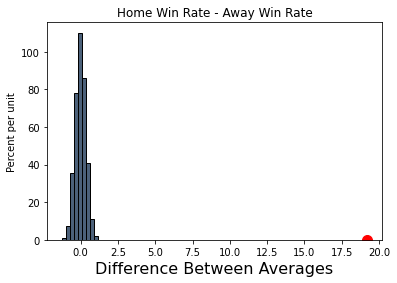

In [ ]:
Table().with_column('Difference Between Averages', differences).hist(density=True)
plots.scatter(observed_difference, 0, color='red', s=100)
plots.title('Home Win Rate - Away Win Rate');

In [ ]:
empirical_P = np.count_nonzero(differences >= observed_difference) / 5000
empirical_P

0.0

In [ ]:
ratio = soccer.select('HomePct','AwayPct').with_column(
    'Home-Away',(soccer.column('HomePct')-soccer.column('AwayPct'))*100
)
ratio

HomePct,AwayPct,Home-Away
58.82%,0.00%,58.8235
17.65%,0.00%,17.6471
64.29%,0.00%,64.2857
66.67%,0.00%,66.6667
46.67%,0.00%,46.6667
35.71%,0.00%,35.7143
40.00%,0.00%,40
35.71%,0.00%,35.7143
45.45%,0.00%,45.4545
45.45%,0.00%,45.4545


In [ ]:
ratio.column('Home-Away').mean()

19.165442874555374

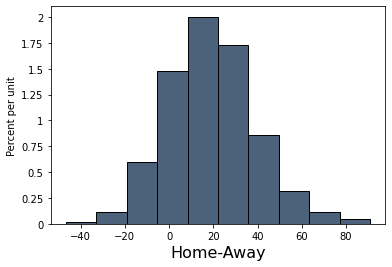

In [ ]:
ratio.select('Home-Away').hist()

In [ ]:
def bootstrap_mean(original_sample, label, replications):
    
    """Returns an array of bootstrapped sample means:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    
    just_one_column = original_sample.select(label)
    means = make_array()
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample()
        resampled_mean = np.mean(bootstrap_sample.column(0))
        means = np.append(means, resampled_mean)
        
    return means

In [ ]:
bstrap_means = bootstrap_mean(ratio, 'Home-Away', 5000)

In [ ]:
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

make_array(left, right)

array([18.69773217, 19.64623002])

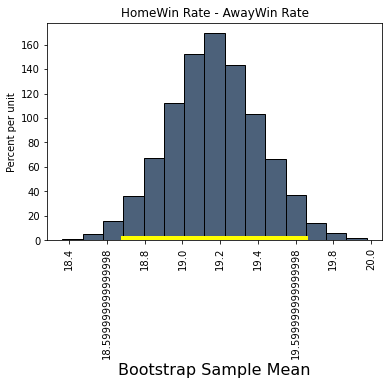

In [ ]:
resampled_means = Table().with_column(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=15)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8)
plots.title('HomeWin Rate - AwayWin Rate');